# Implementing LENET-5
![LENET-5](https://miro.medium.com/max/1200/1*y68ztClLF6ae7P53ayyFzQ.png)

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Conv2D,AveragePooling2D
from keras.models import Sequential

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
y_train[0]

5

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating model

In [12]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5), padding='valid', activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding= 'valid'))

model.add(Conv2D(16,kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding= 'valid'))

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [13]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [14]:
history = model.fit(X_train,y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test,y_test))

Epoch 1/10
469/469 [==============================] - 14s 7ms/step - loss: 0.3526 - accuracy: 0.8977 - val_loss: 0.1539 - val_accuracy: 0.9540
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1261 - accuracy: 0.9616 - val_loss: 0.0925 - val_accuracy: 0.9701
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0705 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0510 - val_accuracy: 0.9824
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0471 - val_accuracy: 0.9841
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0461 - val_accuracy: 0.9841
Epoch

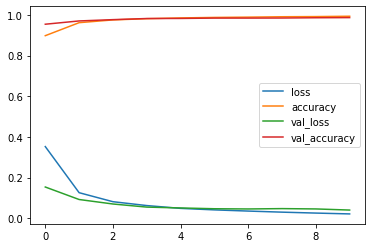

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9865


[0.04068133234977722, 0.9865000247955322]

In [21]:
preds = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
import numpy as np
pred_img = np.argmax(preds[5])
pred_img

1

In [23]:
y_test[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)